In [1]:
import random
import pandas as pd
!pip install faker
from faker import Faker
from datetime import datetime, timedelta

fake = Faker()

# Generate synthetic dataset
data = []
n_samples = 10000  # Change as needed

# Simulated phishing patterns using social engineering tactics
phishing_senders = ["security@bankalerts.com", "support@paypal-verification.com", "noreply@amazon-secure.com", "lottery@prizeclaim.com"]
phishing_subjects = [
    "Urgent: Your Account is at Risk!",
    "Security Alert: Verify Your Identity Now",
    "Immediate Action Required: Password Reset",
    "Exclusive Offer: Claim Now!",
    "Your Package is on Hold - Confirm Details",
    "Congratulations! You Won a Gift Card!",
    "Action Required: Verify Your Payment Details",
    "Your Subscription is Expiring - Renew Now"
]

phishing_bodies = [
    "We detected unusual activity in your account. Click below to secure it: http://phishing-link.com",
    "Your payment information needs urgent verification. Please update it here: http://scam-url.com",
    "Your package cannot be delivered until you confirm your address: http://fake-tracking.com",
    "You've won a $1000 gift card! Claim now before it expires: http://fraud-offer.com",
    "Dear user, your email storage is full. Verify your details to avoid account suspension: http://fake-email-verification.com",
    "We noticed a suspicious login attempt. Reset your password immediately: http://fake-security-alert.com"
]

for _ in range(n_samples):
    label = random.choice([0, 1])  # 50% phishing, 50% legitimate

    if label == 1:  # Phishing email
        sender = random.choice(phishing_senders)
        subject = random.choice(phishing_subjects)
        body = random.choice(phishing_bodies)
        urls = 1  # Phishing emails usually contain URLs
    else:  # Legitimate email
        sender = fake.email()
        subject = fake.sentence()
        body = fake.paragraph()
        urls = random.choice([0, 1])  # Some legit emails may contain links

    receiver = fake.email()
    date = fake.date_between(start_date="-2y", end_date="today").strftime("%Y-%m-%d %H:%M:%S")

    data.append([sender, receiver, date, subject, body, label, urls])

# Create DataFrame
df = pd.DataFrame(data, columns=["sender", "receiver", "date", "subject", "body", "label", "urls"])

# Save to CSV
df.to_csv("synthetic_ceas_dataset.csv", index=False)

print("Synthetic dataset generated: synthetic_ceas_dataset.csv")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00
Synthetic dataset generated: synthetic_ceas_dataset.csv


In [6]:
# Import necessary libraries
import pandas as pd

# Load manually collected dataset
manual_df = pd.read_csv("/content/CEAS_08.csv")

# Load synthetic dataset
synthetic_df = pd.read_csv("/content/synthetic_ceas_dataset.csv")

# Check the structure
print(manual_df.head())
print(synthetic_df.head())

# Combine both datasets
df = pd.concat([manual_df, synthetic_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

print("Combined dataset size:", df.shape)


# Display dataset information
print("Dataset Info:")
print(df.info())

# Show the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [7]:
# Drop rows with missing essential data (subject, body, label)
df = df.dropna(subset=['subject', 'body', 'label'])

# Remove duplicates
df = df.drop_duplicates()

# Extract domain from sender email
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if '@' in str(x) else 'unknown')

# Convert labels to integer (if not already)
#df['label'] = df['label'].astype(int)

# Display cleaned data summary
print("Dataset after cleaning:")
print(df.info())
print("\nFirst 5 Rows after cleaning:")
print(df.head())

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 49126 entries, 0 to 49153
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sender         49126 non-null  object
 1   receiver       48669 non-null  object
 2   date           49126 non-null  object
 3   subject        49126 non-null  object
 4   body           49126 non-null  object
 5   label          49126 non-null  int64 
 6   urls           49126 non-null  int64 
 7   sender_domain  49126 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.4+ MB
None

First 5 Rows after cleaning:
                                         sender  \
0  Jocelyn Lockwood <Jocelyn@oe-consulting.com>   
1   "alt.spam group" <uiaregi@googlegroups.com>   
2           Dave Plater <pliprbcbyji@gmail.com>   
3               thompsonchristopher@example.org   
4               support@paypal-verification.com   

                                            receive

In [8]:
import re

# Feature 1: Subject Length
df['subject_length'] = df['subject'].apply(lambda x: len(str(x)))

# Feature 2: Presence of URLs (1 if URLs exist, else 0)
url_pattern = r'https?://\S+|www\.\S+'
df['contains_url'] = df['body'].apply(lambda x: 1 if re.search(url_pattern, str(x)) else 0)

# Feature 3: Suspicious Words in Subject
suspicious_keywords = ['urgent', 'click', 'free', 'win', 'winner', 'congratulations', 'password', 'account', 'verify']
df['suspicious_subject'] = df['subject'].apply(lambda x: 1 if any(word in str(x).lower() for word in suspicious_keywords) else 0)

# Feature 4: Sender Domain Legitimacy (Assume common domains are legit)
trusted_domains = ['gmail.com', 'yahoo.com', 'outlook.com', 'hotmail.com']
df['is_trusted_sender'] = df['sender_domain'].apply(lambda x: 1 if x in trusted_domains else 0)

# Display the modified dataset
print("Feature Engineering Completed!")
print(df[['subject_length', 'contains_url', 'suspicious_subject', 'is_trusted_sender', 'label']].head())


Feature Engineering Completed!
   subject_length  contains_url  suspicious_subject  is_trusted_sender  label
0              28             1                   0                  0      1
1              36             1                   0                  0      0
2              75             1                   0                  0      0
3              48             0                   0                  0      0
4              37             1                   1                  0      1


<ipython-input-9-cb8dd8c3e28f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


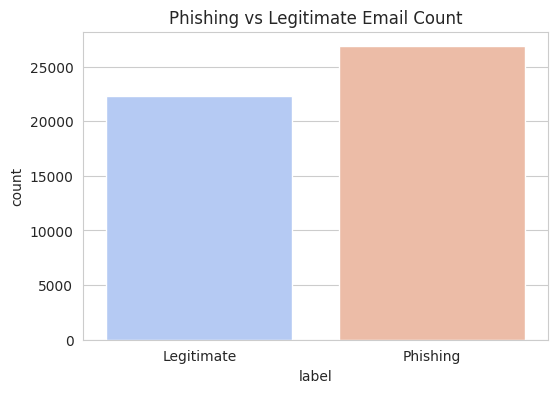

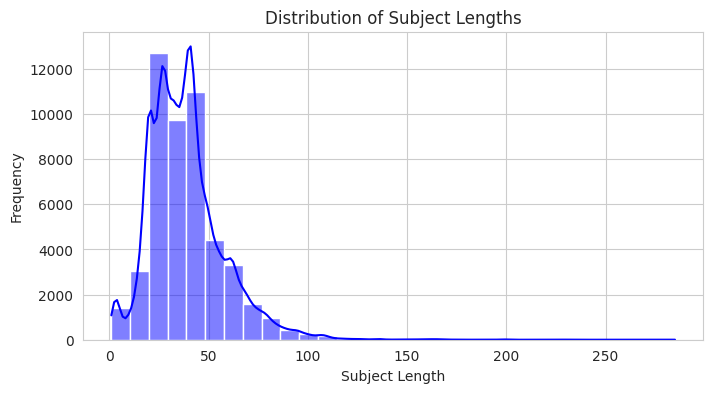

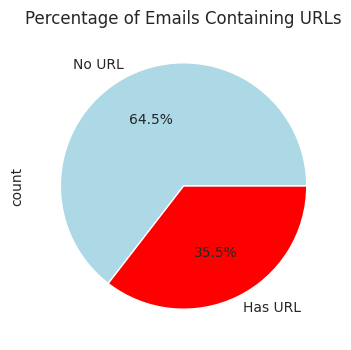

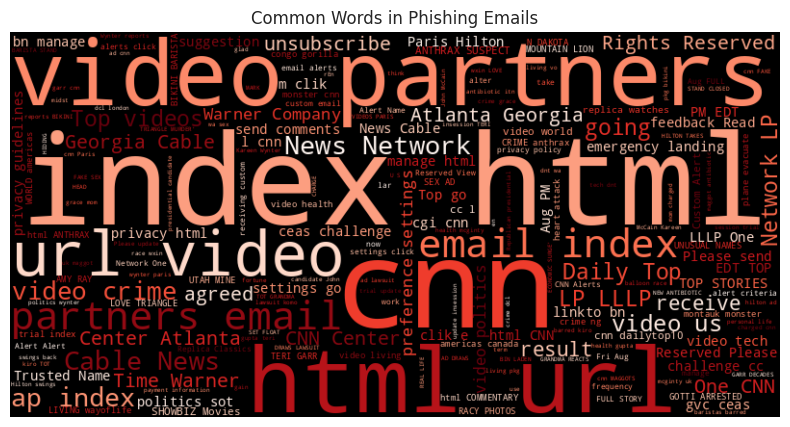

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Set seaborn style
sns.set_style("whitegrid")

# 1️⃣ Distribution of Phishing vs Legitimate Emails
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'])
plt.title("Phishing vs Legitimate Email Count")
plt.show()

# 2️⃣ Subject Length Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['subject_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Subject Lengths")
plt.xlabel("Subject Length")
plt.ylabel("Frequency")
plt.show()

# 3️⃣ Percentage of Emails Containing URLs
plt.figure(figsize=(6, 4))
df['contains_url'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No URL', 'Has URL'], colors=['lightblue', 'red'])
plt.title("Percentage of Emails Containing URLs")
plt.show()

# 4️⃣ Word Cloud for Phishing Emails
phishing_text = " ".join(df[df['label'] == 1]['body'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(phishing_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Phishing Emails")
plt.show()


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6674
           1       0.99      0.99      0.99      8064

    accuracy                           0.99     14738
   macro avg       0.99      0.99      0.99     14738
weighted avg       0.99      0.99      0.99     14738

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6674
           1       0.99      0.99      0.99      8064

    accuracy                           0.99     14738
   macro avg       0.99      0.99      0.99     14738
weighted avg       0.99      0.99      0.99     14738



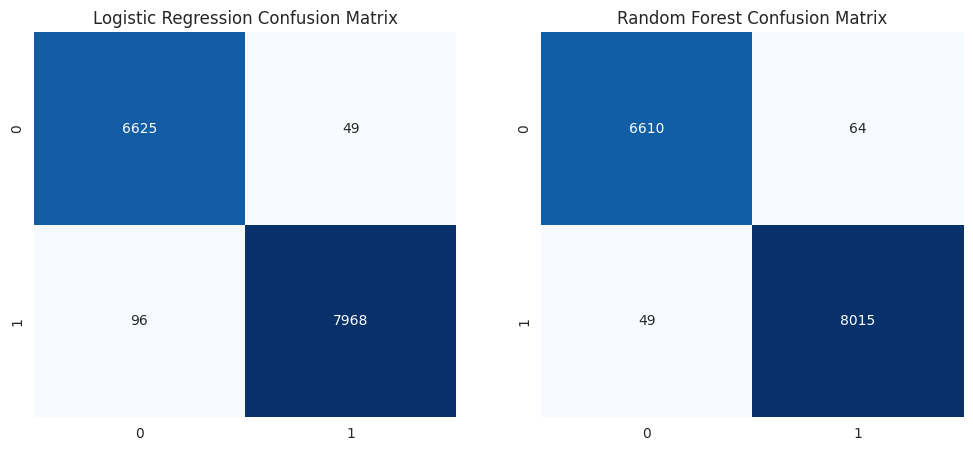

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Prepare Data
X = df['body']  # Email body
y = df['label']  # Labels (0 = Legitimate, 1 = Phishing)

# 2️⃣ Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4️⃣ Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# 5️⃣ Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# 6️⃣ Evaluate Models
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrices
plt.figure(figsize=(12, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")

plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6674
           1       0.99      0.99      0.99      8064

    accuracy                           0.99     14738
   macro avg       0.99      0.99      0.99     14738
weighted avg       0.99      0.99      0.99     14738

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6674
           1       0.99      0.99      0.99      8064

    accuracy                           0.99     14738
   macro avg       0.99      0.99      0.99   

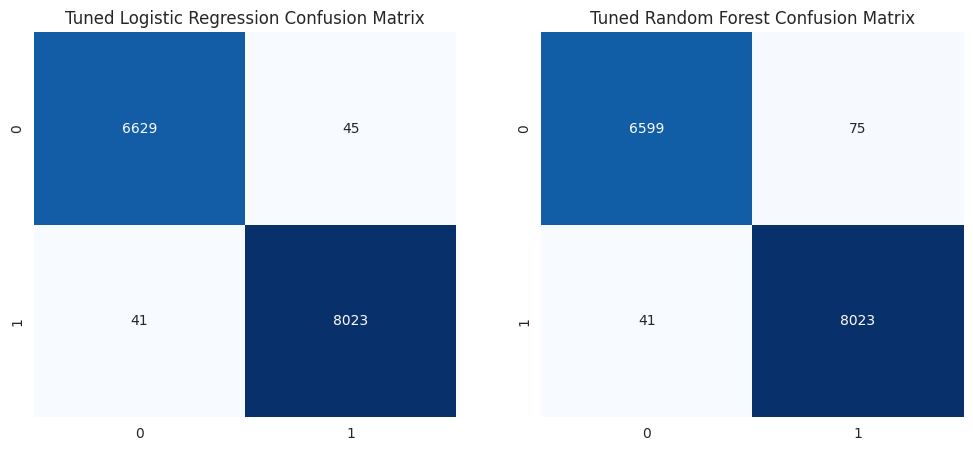

In [11]:
from sklearn.model_selection import GridSearchCV

# 1️⃣ Hyperparameter tuning for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver for smaller datasets
}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_param_grid, cv=5, verbose=1)
log_reg_grid.fit(X_train_tfidf, y_train)

print("Best parameters for Logistic Regression: ", log_reg_grid.best_params_)

# 2️⃣ Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, verbose=1)
rf_grid.fit(X_train_tfidf, y_train)

print("Best parameters for Random Forest: ", rf_grid.best_params_)

# 3️⃣ Evaluate Models with Best Parameters
# Logistic Regression with tuned parameters
best_log_reg = log_reg_grid.best_estimator_
y_pred_log_reg_tuned = best_log_reg.predict(X_test_tfidf)
print("Tuned Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg_tuned))

# Random Forest with tuned parameters
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_tfidf)
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrices
plt.figure(figsize=(12, 5))

# Tuned Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg_tuned), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tuned Logistic Regression Confusion Matrix")

# Tuned Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tuned Random Forest Confusion Matrix")

plt.show()


Logistic Regression Final Accuracy: 0.9942
Random Forest Final Accuracy: 0.9921


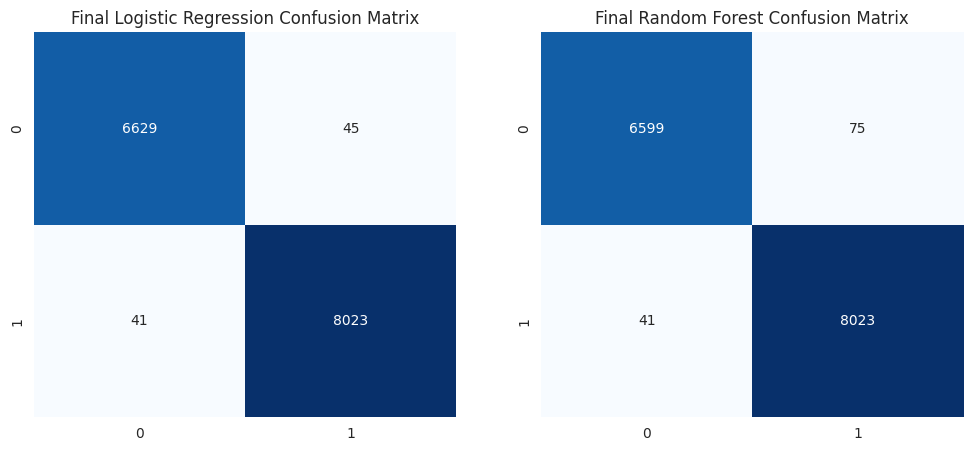

In [12]:
import joblib
from sklearn.metrics import accuracy_score

# 1️⃣ Final Evaluation on Test Set
# Logistic Regression Final Evaluation
y_pred_log_reg_final = best_log_reg.predict(X_test_tfidf)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg_final)
print(f"Logistic Regression Final Accuracy: {log_reg_accuracy:.4f}")

# Random Forest Final Evaluation
y_pred_rf_final = best_rf.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, y_pred_rf_final)
print(f"Random Forest Final Accuracy: {rf_accuracy:.4f}")

# 2️⃣ Save the Best Model for Deployment
# Save the Logistic Regression model
joblib.dump(best_log_reg, 'logistic_regression_model.pkl')

# Save the Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')

# 3️⃣ Confusion Matrices for Final Evaluation
plt.figure(figsize=(12, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg_final), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Final Logistic Regression Confusion Matrix")

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_final), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Final Random Forest Confusion Matrix")

plt.show()


In [13]:
# Load the saved model (Logistic Regression )
model = joblib.load('logistic_regression_model.pkl')
# Save the vectorizer after training
joblib.dump(vectorizer, "vectorizer.pkl")
print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!
